Строим распределение ирисов

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iris = datasets.load_iris() # По 50 цветков каждого типа
X = iris.data[:100, :2]  # we only take the first two features.
y = iris.target[:100]

(1.5, 4.9)

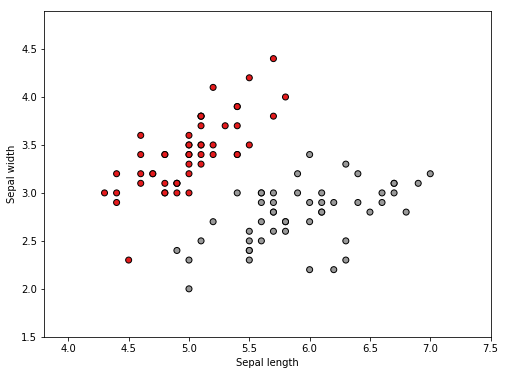

In [4]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())

In [5]:
# Строим разделяющие линию - зависит от a и b

In [6]:
def giveLine(a,b):
    ## возвращает прямую a*x + b
    ## ! можно заменить на лямбда-функцию
    def Line(x):
        return a*x + b
    return Line

In [7]:
# Ограничить a и b

(1.5, 4.9)

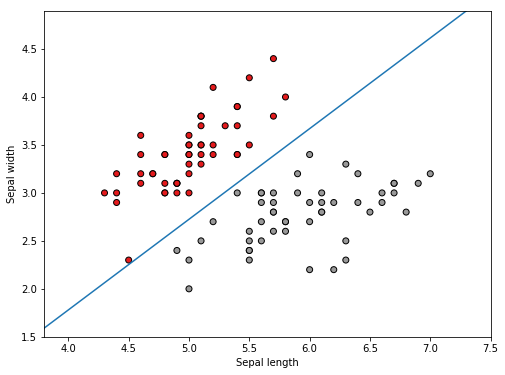

In [8]:
#x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
#y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

a,b = .945,-2 # Взято на глаз
f = giveLine(a,b)

X_dots = np.arange(x_min, x_max, .001)
Y_dots = f(X_dots)

plt.plot(X_dots, Y_dots)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

In [113]:
def Accuracy(a,b,x_1,x_2,y):
    
    f = giveLine(a,b) # По a и b построили прямую
    accuracy = 0
    
    for i in range(len(y)):
        predictit = 0 if x_1[i]*a+b - x_2[i] < 0 else 1 # Все что левее - нулевой класс, что правее и на прямой - первый
        accuracy += int(predictit != y[i])
    
    return 1 - accuracy / len(y)

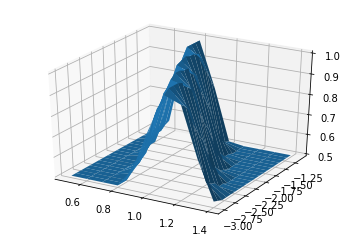

In [155]:
a_range = np.arange(.5,1.5,.1)
b_range = np.arange(-3,-1,.1)

accuracy = []

for b in b_range:
    accuracy.append([])
    for a in a_range:
        accuracy[-1].append(Accuracy(a, b, X[:, 0], X[:, 1],y))
        
a_range, b_range = np.meshgrid(a_range, b_range)

fig = plt.figure()
ax = fig.gca(projection='3d')

accuracy = np.array(accuracy)

ax.plot_surface(a_range, b_range, accuracy)

In [ ]:
# TODO генерировать двухмерное распределение

In [ ]:
plt.figure(2, figsize=(8, 6))
plt.clf()

In [168]:
def normal2D(x,y,loc,scale,size):
    return np.array([x + np.random.normal(loc,scale, size), y + np.random.normal(loc,scale, size)])

In [176]:
# np.vstack([normal2D(0,0,1,1,10),[0 for i in range(10)]])

array([[ 0.84225209,  1.29908797,  1.31109672,  0.70030766,  1.12566284,
         2.31257157,  0.33398443,  1.63159419,  0.27421199,  1.96753508],
       [-0.25756674,  1.88325676,  1.70698237,  3.05597508,  1.33457565,
         0.87313754,  0.08899826,  1.3248811 ,  1.67140238,  0.18520548],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

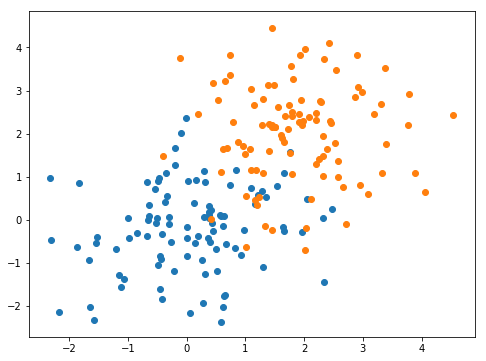

In [181]:
plt.figure(2, figsize=(8, 6))
plt.clf()

first_dist = normal2D(-1,-1,1,1,100)
second_dist = normal2D(1,1,1,1,100)

plt.scatter(first_dist[0], first_dist[1])
plt.scatter(second_dist[0], second_dist[1])
